In [19]:
import pandas as pd
import matplotlib.pyplot as plt

There is a relation between the price and the characteristics of the house.

Loading the data

In [25]:
df = pd.read_csv("house_prices_colombia_soacha.csv")
df

,Unnamed: 0,price,Habitaciones,Baños,Área construída,Área privada,Estrato,Estado,Antigüedad,Piso N°,Administración,Precio m²,Tipo de apartamento,Parqueaderos
0,0,$ 130.000.000,3.0,2.0,51 m²,0 m²,3.0,Bueno,1 a 8 años,2.0,$ 79.000 COP,"$ 2.549.019,61*m²",NaN,NaN
1,1,$ 112.000.000,2.0,1.0,44 m²,44 m²,2.0,Bueno,9 a 15 años,1.0,No definida,"$ 2.545.454,55*m²",NaN,NaN
2,2,$ 150.000.000,3.0,1.0,70 m²,64 m²,3.0,Remodelado,1 a 8 años,6.0,$ 50 COP,"$ 2.142.857,14*m²",NaN,NaN
3,3,$ 152.152.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,$ 100.000.000,3.0,1.0,56 m²,56 m²,3.0,Remodelado,9 a 15 años,6.0,No definida,"$ 1.785.714,29*m²",Loft,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,$ 139.000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,316,$ 120.000.000,2.0,1.0,47 m²,42 m²,3.0,Bueno,16 a 30 años,3.0,$ 50.000 COP,"$ 2.553.191,49*m²",NaN,NaN
317,317,$ 137.000.000,3.0,2.0,61 m²,61 m²,3.0,Bueno,1 a 8 años,1.0,$ 80.000 COP,"$ 2.245.901,64*m²",NaN,NaN
318,318,$ 149.000.000,3.0,2.0,69 m²,70 m²,3.0,Excelente,1 a 8 años,2.0,$ 72.000 COP,"$ 2.159.420,29*m²",NaN,NaN


Cleaning the data

In [26]:
df["Precio"] = df.price.str.lstrip("$").str.replace(".", "")
df["Habitaciones"] = df["Habitaciones"]
df["Baños"] = df["Baños"]
df["Estrato"] = df["Estrato"]
df["Piso N°"] = df["Piso N°"]
df["Área construída (m²)"] = df["Área construída"].str.replace("m²", "")
df["Área privada (m²)"] = df["Área privada"].str.replace("m²", "")

<ipython-input-26-2a4e98ea62fe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Precio"] = df.price.str.lstrip("$").str.replace(".", "")


In [27]:
df = df.drop(columns=['Unnamed: 0', 'price', 'Área construída', 'Área privada'])
df

,Habitaciones,Baños,Estrato,Estado,Antigüedad,Piso N°,Administración,Precio m²,Tipo de apartamento,Parqueaderos,Precio,Área construída (m²),Área privada (m²)
0,3.0,2.0,3.0,Bueno,1 a 8 años,2.0,$ 79.000 COP,"$ 2.549.019,61*m²",NaN,NaN,130000000,51,0
1,2.0,1.0,2.0,Bueno,9 a 15 años,1.0,No definida,"$ 2.545.454,55*m²",NaN,NaN,112000000,44,44
2,3.0,1.0,3.0,Remodelado,1 a 8 años,6.0,$ 50 COP,"$ 2.142.857,14*m²",NaN,NaN,150000000,70,64
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152152000,NaN,NaN
4,3.0,1.0,3.0,Remodelado,9 a 15 años,6.0,No definida,"$ 1.785.714,29*m²",Loft,NaN,100000000,56,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139000000,NaN,NaN
316,2.0,1.0,3.0,Bueno,16 a 30 años,3.0,$ 50.000 COP,"$ 2.553.191,49*m²",NaN,NaN,120000000,47,42
317,3.0,2.0,3.0,Bueno,1 a 8 años,1.0,$ 80.000 COP,"$ 2.245.901,64*m²",NaN,NaN,137000000,61,61
318,3.0,2.0,3.0,Excelente,1 a 8 años,2.0,$ 72.000 COP,"$ 2.159.420,29*m²",NaN,NaN,149000000,69,70


In [28]:
df.dtypes

Habitaciones            float64
Baños                   float64
Estrato                 float64
Estado                   object
Antigüedad               object
Piso N°                 float64
Administración           object
Precio m²                object
Tipo de apartamento      object
Parqueaderos             object
Precio                   object
Área construída (m²)     object
Área privada (m²)        object
dtype: object

In [29]:
plt.scatter(df["price"], df["Habitaciones"])

KeyError: 'price'

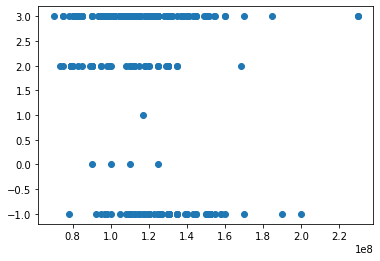

In [15]:
plt.scatter(df["price"], df["Estrato"])

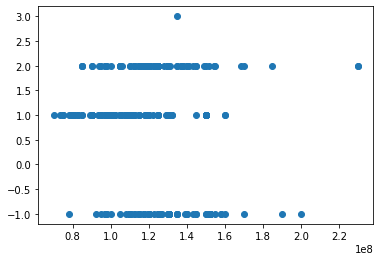

In [16]:
plt.scatter(df["price"], df["Baños"])

In [30]:
df.to_csv("houses_soacha.csv")

In [31]:
df.columns

Index(['Habitaciones', 'Baños', 'Estrato', 'Estado', 'Antigüedad', 'Piso N°',
       'Administración', 'Precio m²', 'Tipo de apartamento', 'Parqueaderos',
       'Precio', 'Área construída (m²)', 'Área privada (m²)'],
      dtype='object')